In [1]:
%matplotlib inline
#python basic libs
from __future__ import print_function

from tempfile import mkdtemp
from shutil import rmtree
import os;
from os.path import join as pathjoin;

import re;
import glob;
import json;
import codecs;
import itertools;
from collections import defaultdict, Counter;
import pprint;

from pprint import pprint
from time import time
import logging


#data analysis libs
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import random;
np.set_printoptions(precision=4)

#machine learning libs
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

#preprocessing and transformation
from sklearn.preprocessing import normalize, MaxAbsScaler, MinMaxScaler, StandardScaler;
from sklearn.preprocessing import LabelBinarizer;
from sklearn.decomposition import PCA, KernelPCA, FastICA;
from sklearn.metrics.pairwise import cosine_similarity;
from scipy.spatial.distance import cosine;


from sklearn.base import BaseEstimator, ClassifierMixin

#classifiers
from sklearn.linear_model import LogisticRegression


#
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

#model valuation
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score;


In [55]:
from __future__ import print_function

import logging
import numpy as np
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import metrics


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
    'sci.space',
]
remove = ('headers', 'footers', 'quotes')


print("Loading 20 newsgroups dataset for categories:")
print(categories if categories else "all")

data_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42,remove=remove)
data_test = fetch_20newsgroups(subset='test', categories=categories,shuffle=True, random_state=42,remove=remove)
print('data loaded')

# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names

# split a training set and a test set
y_train, y_test = data_train.target, data_test.target

print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,stop_words='english')
X_train = vectorizer.fit_transform(data_train.data)

duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(data_test.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

# mapping from integer feature name to original token string
feature_names = vectorizer.get_feature_names()

print("Extracting 1000 best features by a chi-squared test" )
t0 = time()
ch2 = SelectKBest(chi2, k=1000)
X_train = ch2.fit_transform(X_train, y_train)
X_test = ch2.transform(X_test)

feature_names = [feature_names[i] for i in ch2.get_support(indices=True)]
print("done in %fs" % (time() - t0))
print()


feature_names = np.asarray(feature_names)



Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.space']
data loaded
Extracting features from the training data using a sparse vectorizer
done in 0.607905s at 6.546MB/s
n_samples: 2647, n_features: 28711

Extracting features from the test data using the same vectorizer
done in 0.296904s at 9.658MB/s
n_samples: 1760, n_features: 28711

Extracting 1000 best features by a chi-squared test
done in 0.017791s



In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joseeleandrocustodio/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
data_train.data[0]

u"Hi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation.  But if you save\nto a .PRJ file their positions/orientation are preserved.  Does anyone\nknow why this information is not stored in the .3DS file?  Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych"

In [59]:
def splitNgrams(doc, ngrams=3):
    from nltk.tokenize import word_tokenize
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    doc = re.sub(r'\_|\/|=',' ',doc)
    doc = re.sub(r'\d+','*',doc)
    #from nltk.corpus import stopwords
    #stopwords.words('english')
    #return [doc[i:(i+ngrams)] for i in range(len(doc)-ngrams)]
    return [t for t in word_tokenize(doc.lower()) if len(t)>3]

In [33]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

In [34]:
from collections import Counter
import string


In [58]:
sentences = [TaggedDocument(words=splitNgrams(w), tags=[t]) for w,t in  zip(data_train.data, data_train.target)]
model = Doc2Vec(vector_size=150, 
                window=10,
                min_count=10,
                workers=-1,
                alpha=0.025,
                min_alpha=0.00025
                ) # use fixed learning rate
model.build_vocab(sentences);
model.random.seed(0);
random.seed(4);
seq = np.arange(len(sentences));
for epoch in range(15):
    print ("Iteration %s "% epoch)
    model.train(sentences,total_examples=model.corpus_count, epochs=model.epochs)
    model.alpha -= 0.0002 # decrease the learning rate
    model.min_alpha = model.alpha/100.0 # fix the learning rate, no deca
    random.shuffle(sentences)

2018-07-15 11:47:34,020 WARNING consider setting layer size to a multiple of 4 for greater performance
2018-07-15 11:47:34,024 INFO collecting all words and their counts
2018-07-15 11:47:34,025 INFO PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-07-15 11:47:34,151 INFO collected 27488 word types and 315 unique tags from a corpus of 2647 examples and 268361 words
2018-07-15 11:47:34,153 INFO Loading a fresh vocabulary
2018-07-15 11:47:34,195 INFO min_count=10 retains 4038 unique words (14% of original 27488, drops 23450)
2018-07-15 11:47:34,196 INFO min_count=10 leaves 216589 word corpus (80% of original 268361, drops 51772)
2018-07-15 11:47:34,211 INFO deleting the raw counts dictionary of 27488 items
2018-07-15 11:47:34,213 INFO sample=0.001 downsamples 43 most-common words
2018-07-15 11:47:34,215 INFO downsampling leaves estimated 195558 word corpus (90.3% of prior 216589)
2018-07-15 11:47:34,236 INFO estimated required memory for 4038 words and 150 dimen

Iteration 0 
Iteration 1 
Iteration 2 


2018-07-15 11:47:34,511 INFO EPOCH - 5 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:34,519 WARNING EPOCH - 5 : supplied example count (0) did not equal expected count (2647)
2018-07-15 11:47:34,520 INFO training on a 0 raw words (0 effective words) took 0.1s, 0 effective words/s
2018-07-15 11:47:34,525 WARNING Effective 'alpha' higher than previous training cycles
2018-07-15 11:47:34,527 INFO training model with -1 workers on 4038 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2018-07-15 11:47:34,538 INFO EPOCH - 1 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:34,540 WARNING EPOCH - 1 : supplied example count (0) did not equal expected count (2647)
2018-07-15 11:47:34,543 INFO EPOCH - 2 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:34,553 WARNING EPOCH - 2 : supplied example count (0) did not equal expected coun

Iteration 3 
Iteration 4 
Iteration 5 


2018-07-15 11:47:34,727 WARNING EPOCH - 5 : supplied example count (0) did not equal expected count (2647)
2018-07-15 11:47:34,729 INFO training on a 0 raw words (0 effective words) took 0.1s, 0 effective words/s
2018-07-15 11:47:34,734 WARNING Effective 'alpha' higher than previous training cycles
2018-07-15 11:47:34,735 INFO training model with -1 workers on 4038 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2018-07-15 11:47:34,738 INFO EPOCH - 1 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:34,749 WARNING EPOCH - 1 : supplied example count (0) did not equal expected count (2647)
2018-07-15 11:47:34,757 INFO EPOCH - 2 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:34,761 WARNING EPOCH - 2 : supplied example count (0) did not equal expected count (2647)
2018-07-15 11:47:34,766 INFO EPOCH - 3 : training on 0 raw words (0 effective words) took 0.0s, 0 effective

Iteration 6 
Iteration 7 
Iteration 8 


2018-07-15 11:47:34,935 INFO EPOCH - 5 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:34,944 WARNING EPOCH - 5 : supplied example count (0) did not equal expected count (2647)
2018-07-15 11:47:34,945 INFO training on a 0 raw words (0 effective words) took 0.1s, 0 effective words/s
2018-07-15 11:47:34,952 WARNING Effective 'alpha' higher than previous training cycles
2018-07-15 11:47:34,953 INFO training model with -1 workers on 4038 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2018-07-15 11:47:34,961 INFO EPOCH - 1 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:34,967 WARNING EPOCH - 1 : supplied example count (0) did not equal expected count (2647)
2018-07-15 11:47:34,973 INFO EPOCH - 2 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:34,980 WARNING EPOCH - 2 : supplied example count (0) did not equal expected coun

Iteration 9 
Iteration 10 
Iteration 11 


2018-07-15 11:47:35,153 INFO EPOCH - 4 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:35,162 WARNING EPOCH - 4 : supplied example count (0) did not equal expected count (2647)
2018-07-15 11:47:35,170 INFO EPOCH - 5 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:35,175 WARNING EPOCH - 5 : supplied example count (0) did not equal expected count (2647)
2018-07-15 11:47:35,176 INFO training on a 0 raw words (0 effective words) took 0.1s, 0 effective words/s
2018-07-15 11:47:35,181 WARNING Effective 'alpha' higher than previous training cycles
2018-07-15 11:47:35,182 INFO training model with -1 workers on 4038 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2018-07-15 11:47:35,192 INFO EPOCH - 1 : training on 0 raw words (0 effective words) took 0.0s, 0 effective words/s
2018-07-15 11:47:35,194 WARNING EPOCH - 1 : supplied example count (0) did not equal expected coun

Iteration 12 
Iteration 13 
Iteration 14 


In [60]:
model.random.seed(0)
train_vector = np.vstack([
     model.infer_vector( doc_words=splitNgrams(d),steps=40) for d in data_train.data
]);
test_vector = np.vstack([
     model.infer_vector( doc_words=splitNgrams(d),steps=40) for d in data_test.data
])

In [65]:
def plotModel(vectors,labels):
    from sklearn.manifold import TSNE, Isomap
    pca = PCA(2)
    comps = np.round(pca.fit_transform(vectors),2)
    plt.figure(figsize=(10,5))
    plt.scatter(comps[:,0],comps[:,1],cmap=plt.cm.jet,c=labels)
    for i,label in  enumerate(labels):
        plt.text(comps[i,0], comps[i,1], label)

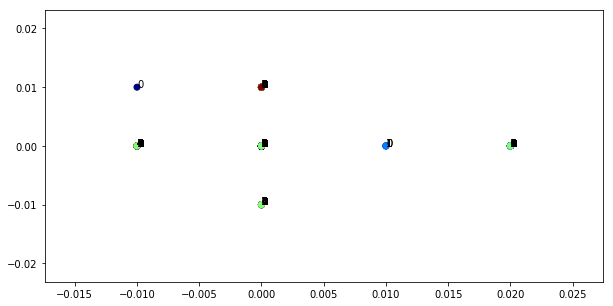

In [66]:
plotModel(train_vector, data_train.target)

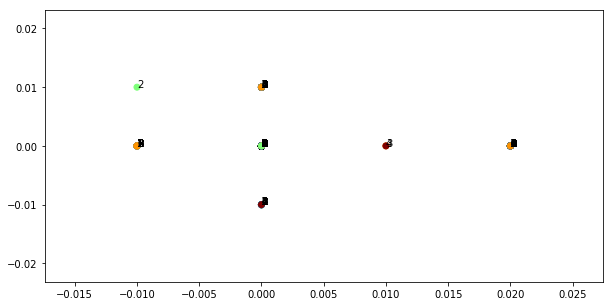

In [68]:
plotModel(test_vector, data_test.target)

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [69]:
clf = LogisticRegression();
clf.fit(train_vector, data_train.target)
pred = clf.predict(test_vector)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support, classification_report
plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion_matrix(pred, data_test.target),classes=[c[-2:] for c in clf.classes_])
print(classification_report(pred, data_test.target))